In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('smartphone_cleaned.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                843 non-null    object 
 1   model                      843 non-null    object 
 2   price                      843 non-null    int64  
 3   rating                     785 non-null    float64
 4   has_5g                     843 non-null    bool   
 5   has_nfc                    843 non-null    bool   
 6   has_ir_blaster             843 non-null    bool   
 7   processor_brand            829 non-null    object 
 8   num_cores                  841 non-null    float64
 9   processor_speed            833 non-null    float64
 10  ram_capacity               843 non-null    float64
 11  internal_memory            843 non-null    float64
 12  battery_capacity           840 non-null    float64
 13  fast_charging_available    843 non-null    int64  

In [ ]:
#HANDLING MISSING VALUES

In [ ]:
# knn imputer

In [24]:
x_df = df.select_dtypes(include=['int64','float64']).drop(columns='price')

In [25]:
from sklearn.impute import KNNImputer

In [26]:
imputer = KNNImputer(n_neighbors=5)

In [27]:
x_df_values = imputer.fit_transform(x_df)

In [28]:
x_df = pd.DataFrame(x_df_values,columns=x_df.columns)

In [29]:
x_df['price'] = df['price']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                843 non-null    object 
 1   model                      843 non-null    object 
 2   price                      843 non-null    int64  
 3   rating                     785 non-null    float64
 4   has_5g                     843 non-null    bool   
 5   has_nfc                    843 non-null    bool   
 6   has_ir_blaster             843 non-null    bool   
 7   processor_brand            829 non-null    object 
 8   num_cores                  841 non-null    float64
 9   processor_speed            833 non-null    float64
 10  ram_capacity               843 non-null    float64
 11  internal_memory            843 non-null    float64
 12  battery_capacity           840 non-null    float64
 13  fast_charging_available    843 non-null    int64  

In [42]:
numerical_columns = x_df.select_dtypes(include=['int64','float64']).columns

In [43]:
# Update the values in df_copy from x_df
df[numerical_columns] = x_df[numerical_columns]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_names                843 non-null    object 
 1   model                      843 non-null    object 
 2   price                      843 non-null    int64  
 3   rating                     843 non-null    float64
 4   has_5g                     843 non-null    bool   
 5   has_nfc                    843 non-null    bool   
 6   has_ir_blaster             843 non-null    bool   
 7   processor_brand            829 non-null    object 
 8   num_cores                  843 non-null    float64
 9   processor_speed            843 non-null    float64
 10  ram_capacity               843 non-null    float64
 11  internal_memory            843 non-null    float64
 12  battery_capacity           843 non-null    float64
 13  fast_charging_available    843 non-null    float64

# univariate 

<Axes: xlabel='brand_names'>

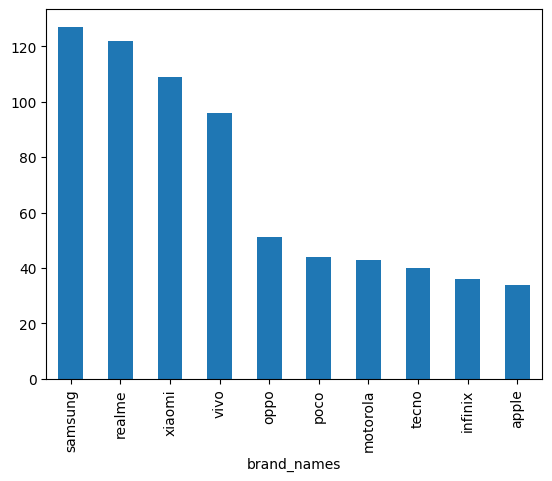

In [45]:
# plot a graph of top 5 brands
df['brand_names'].value_counts().head(10).plot(kind='bar')


<Axes: ylabel='count'>

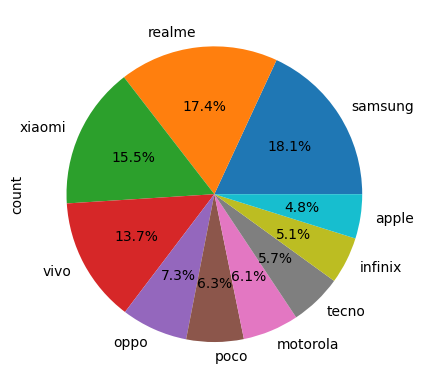

In [46]:
# pie chart
df['brand_names'].value_counts().head(10).plot(kind='pie',autopct='%0.1f%%')

from above it is clear that samsung is leading the market

In [47]:
# price
df['price'].describe()

count       843.000000
mean      25091.036773
std       27502.823189
min        3420.000000
25%       10199.000000
50%       15999.000000
75%       26706.000000
max      196900.000000
Name: price, dtype: float64

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


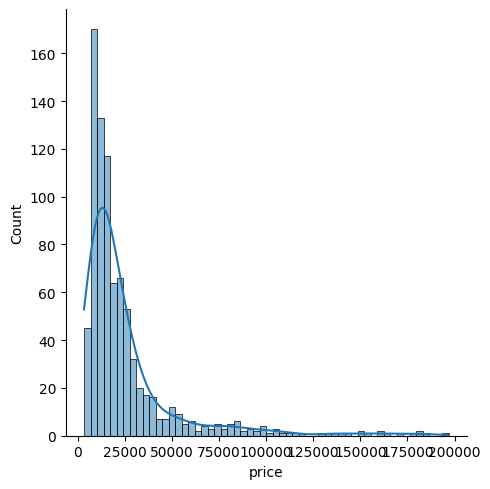

In [48]:
sns.displot(kind='hist',data=df,x='price',kde=True)

In [14]:
df['price'].skew()

3.197918166031671

<Axes: >

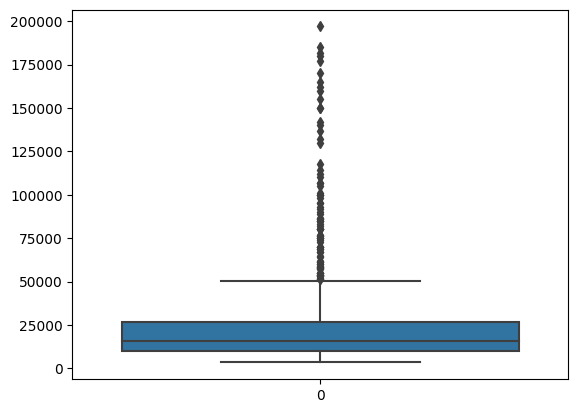

In [15]:
sns.boxplot(df['price'])

In [49]:
#rating
df['rating'].describe()

count    843.000000
mean      77.418505
std        8.011372
min       60.000000
25%       71.000000
50%       79.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


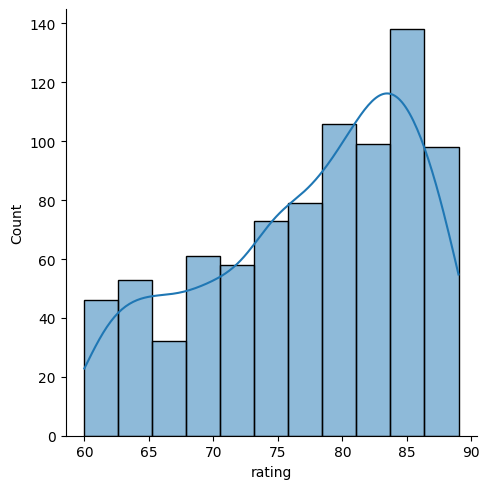

In [50]:
sns.displot(kind='hist',data=df,x='rating',kde=True)

In [51]:
df['rating'].skew()

-0.49556145792197115

<Axes: >

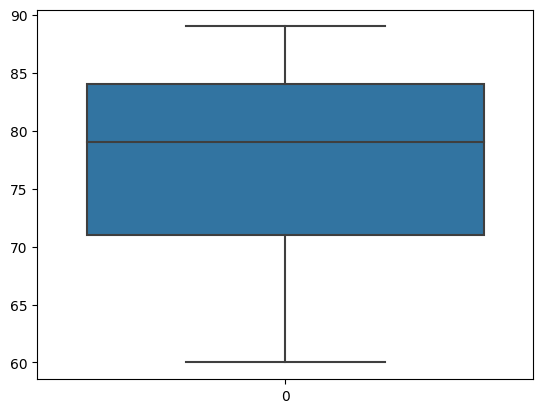

In [52]:
sns.boxplot(df['rating'])

<Axes: ylabel='count'>

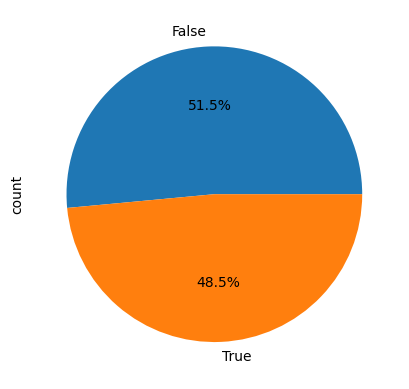

In [53]:
# has_5g
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

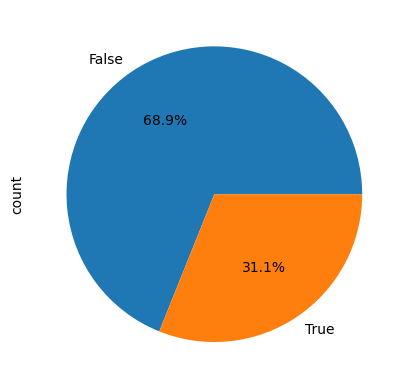

In [54]:
# has_nfc
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

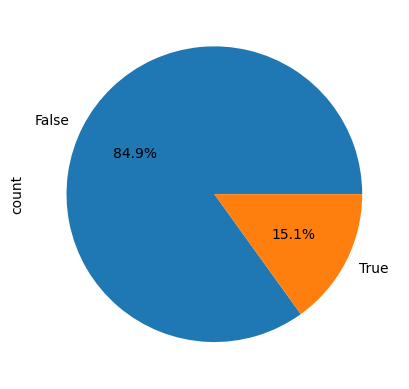

In [55]:
# has_ir_blaster
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='processor_brand'>

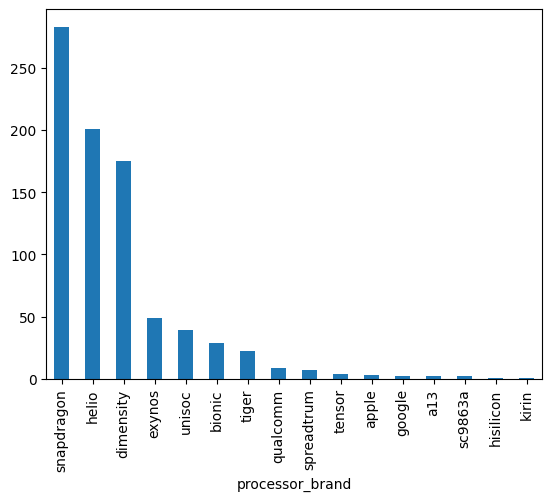

In [66]:
# processor 
df['processor_brand'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

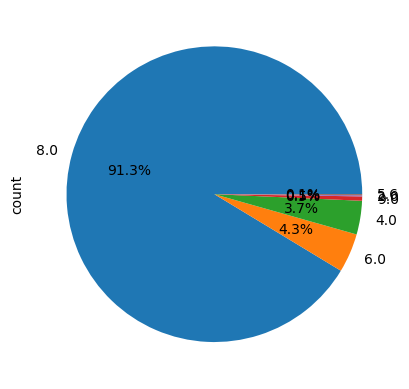

In [60]:
# num_cores
df['num_cores'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='processor_speed'>

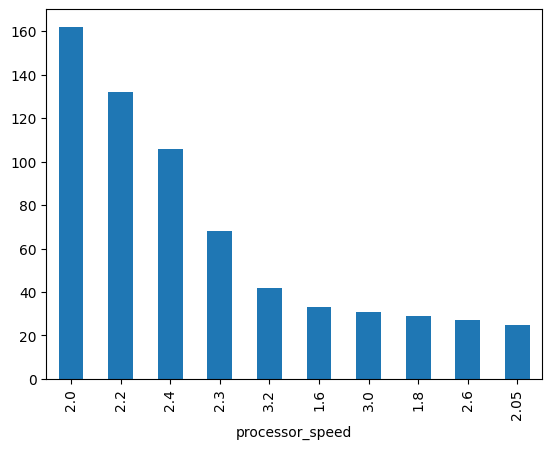

In [67]:
df['processor_speed'].value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

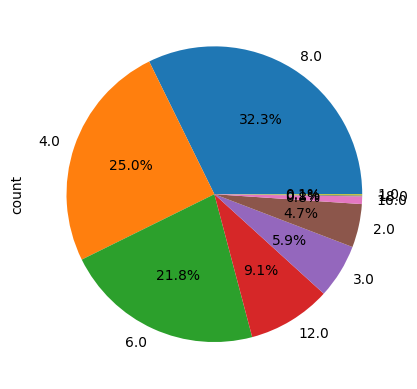

In [65]:
# ram

df['ram_capacity'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

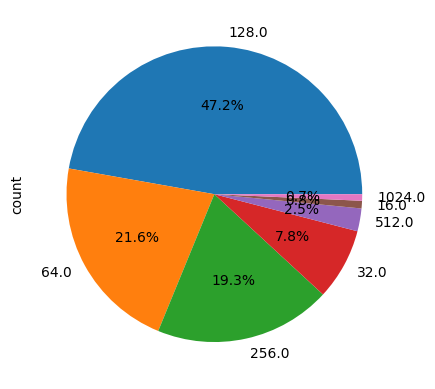

In [70]:
#internal memory  internal_memory 
df['internal_memory'].value_counts().plot(kind='pie',autopct = "%0.1f%%")

<Axes: ylabel='count'>

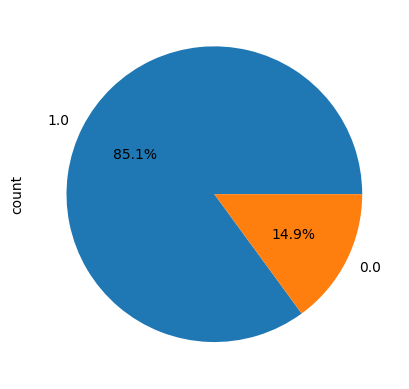

In [72]:
#fast_charging_available 
df['fast_charging_available'].value_counts().plot(kind='pie',autopct = "%0.1f%%")

<Axes: xlabel='fast_charging'>

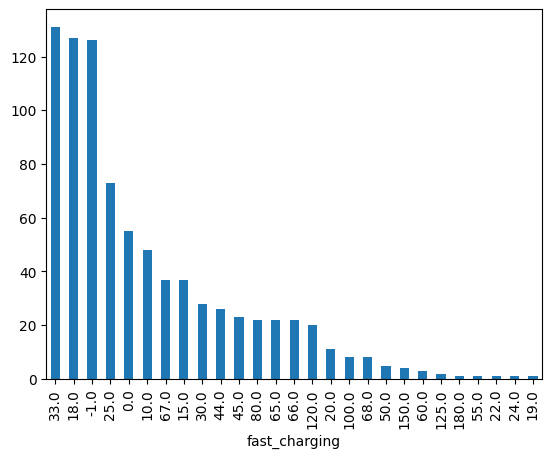

In [76]:
#fast_charging
df['fast_charging'].value_counts().plot(kind ='bar')


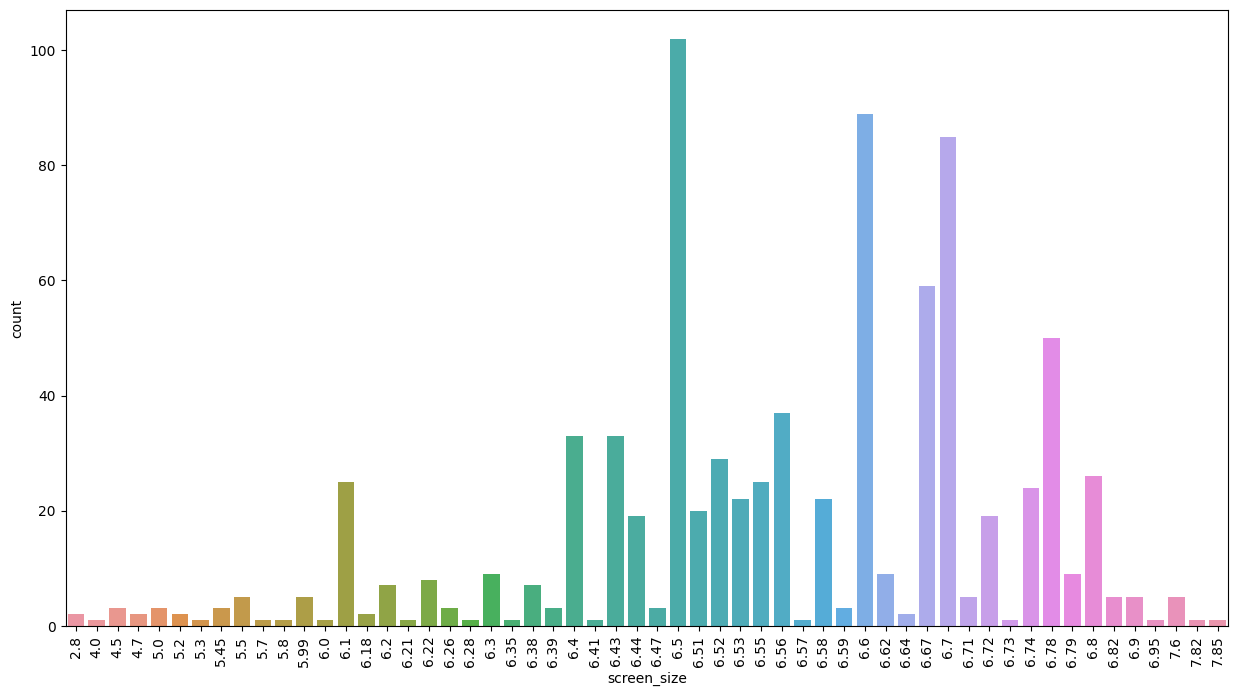

In [81]:
#screen_size
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='screen_size')
plt.xticks(rotation='vertical')
plt.show()

In [99]:
df['resolution'].value_counts()

resolution
1080 x 2400     275
720 x 1600      150
1080 x 2408      48
1080 x 2340      42
720 x 1612       41
1080 x 2412      38
1080 x 2460      33
1600 x 720       18
2400 x 1080      11
1170 x 2532      10
1080 x 2640       9
1440 x 3200       9
1179 x 2556       8
1260 x 2800       8
1080 x 2376       8
720 x 1520        7
1440 x 3216       6
720 x 1650        6
1240 x 2772       6
720 x 1640        6
720 x 1440        6
720 x 1560        5
1812 x 2176       5
1080 x 2280       5
1284 x 2778       5
1290 x 2796       5
1080 x 1920       4
1520 x 720        4
1080 x 2160       4
1080 x 2388       4
1080 x 2404       4
2408 x 1080       4
1440 x 3088       3
2340 x 1080       2
720 x 1280        2
750 x 1334        2
1080 x 2520       2
2460 x 1080       2
1200 x 2664       2
240 x 360         2
1080 x 2246       2
1440 x 3080       2
1344 x 2992       2
828 x 1792        2
854 x 480         1
1440 x 720        1
2280 x 1080       1
480 x 850         1
480 x 1170        1
2000 x 22

In [98]:
# resolution
df[df['resolution'] == 'Full HD+ Display with Punch Hole']

,brand_names,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,ram_capacity,internal_memory,battery_capacity,fast_charging_available,fast_charging,screen_size,resolution,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto


In [97]:
df['resolution'] = df['resolution'].replace('Full HD+ Display with Punch Hole', '1080 x 2220')


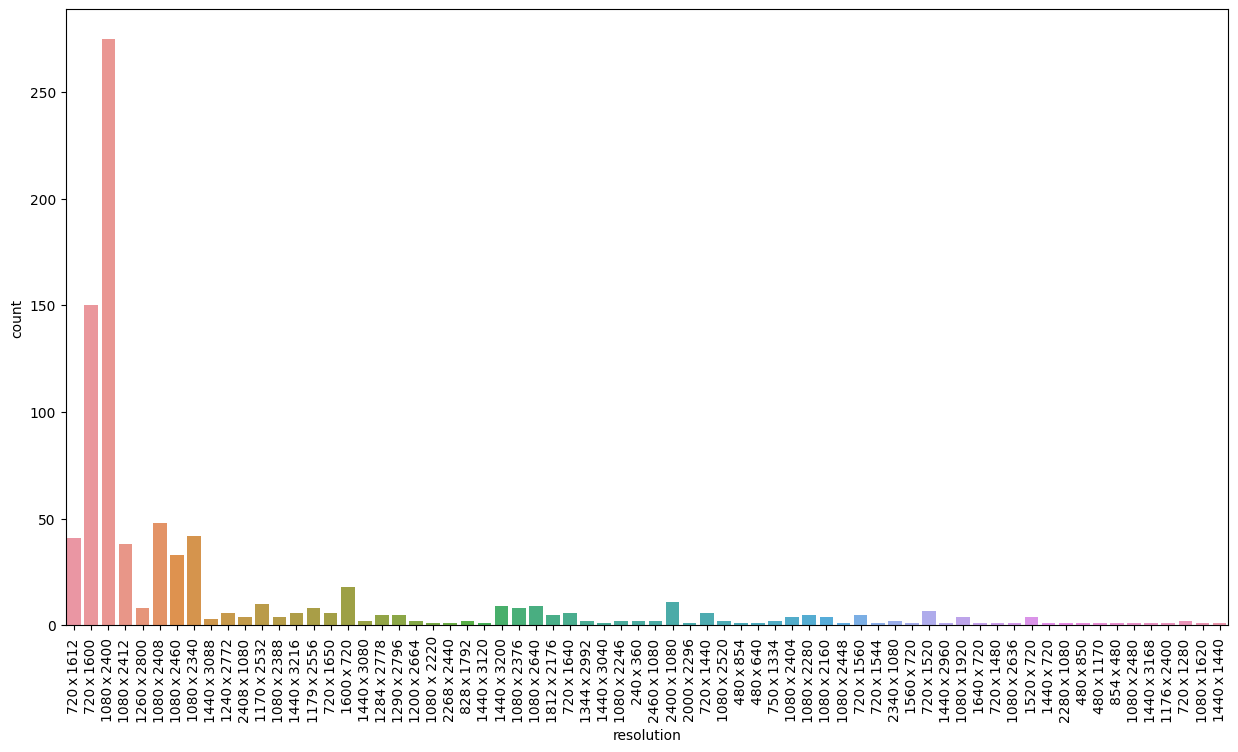

In [100]:
# resolution
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='resolution')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='count'>

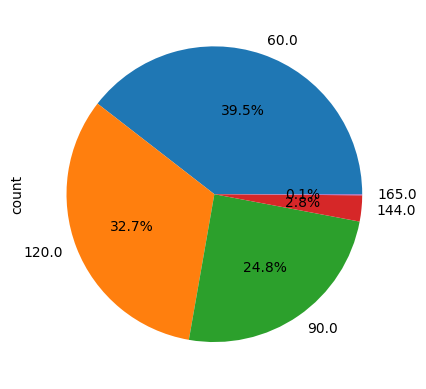

In [102]:
# refresh_rate
df['refresh_rate'].value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: ylabel='count'>

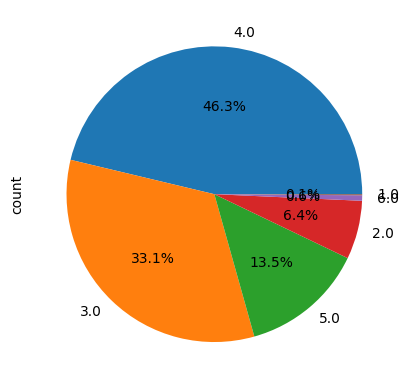

In [103]:
#num_cameras
(df['num_rear_cameras'] + df['num_front_cameras']).value_counts().plot(kind='pie',autopct="%0.1f%%")

<Axes: xlabel='primary_camera_rear'>

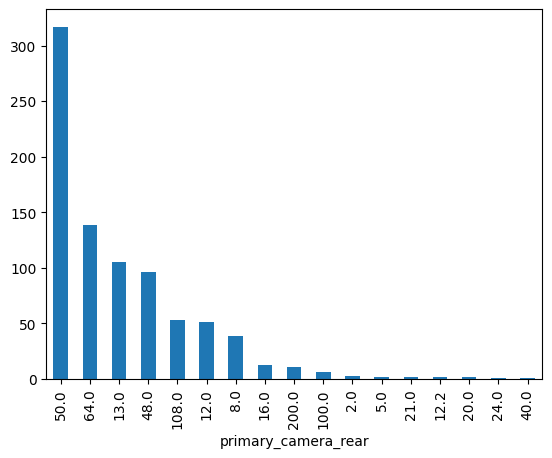

In [106]:
#primary_camera_rear
df['primary_camera_rear'].value_counts().plot(kind='bar')

<Axes: xlabel='primary_camera_front'>

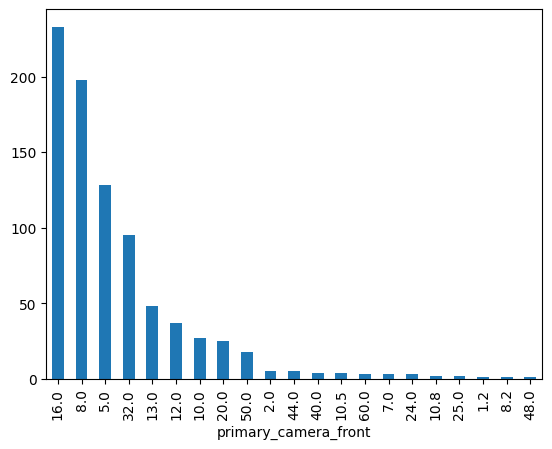

In [107]:
#primary_camera_front
df['primary_camera_front'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

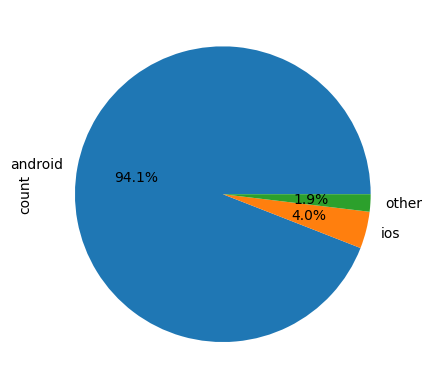

In [104]:
# os
df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

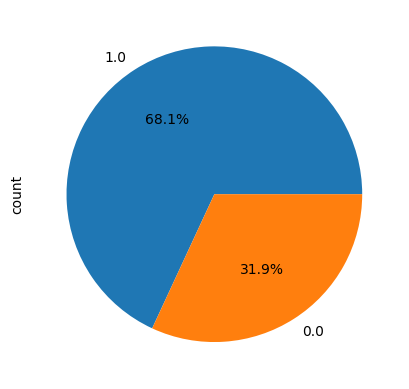

In [108]:
# extended_memory_available
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='extended_upto'>

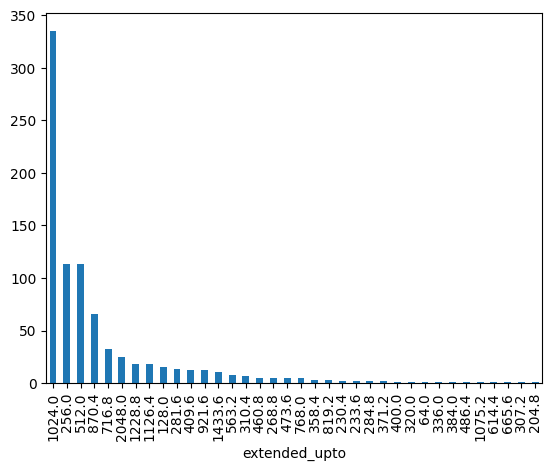

In [109]:
df['extended_upto'].value_counts().plot(kind= 'bar')

From the univariate analysis, we can observe the following insights:

The price distribution is skewed to the right, indicating that most smartphones are in the lower price range.
The rating distribution is approximately normally distributed with a slight left skew.
Most phones have 8 core processor.
Most phones have processor speed b/w 2-2.4 GZ
Ram Capacity 8gb is dominant and common is 4gb and 6gb.
128Gb internal memomry is dominant.
Around 85% phones have fast charging with highly 33 watt fast charging
Most smartphones in the dataset do not have NFC or an IR blaster.
The majority of smartphones have a battery capacity around 5000 mAh.
Screen sizes are mostly clustered around 6.4 to 6.8 inches having 6.5 inches is common
Most Phones have resolutions 1080 x 2400 i.e full hd+
Around 39.5% Phones have 60hz refress rate following 32.7% with 120hz.
Around 94% Phones are of android and 4% of ios operating system

In [118]:

# Define categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.drop(['model']).tolist()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [120]:
# Correlation matrix for numerical columns
correlation_matrix_numerical = df[numerical_features].corr()

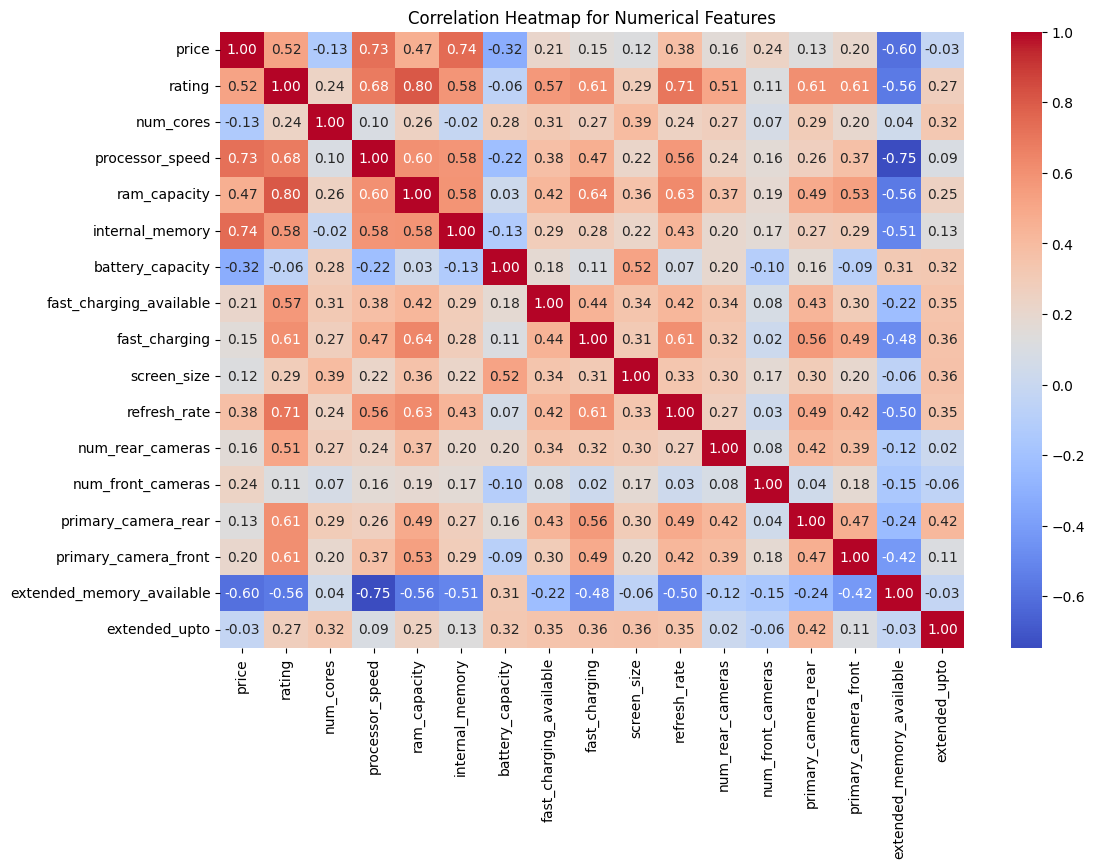

In [121]:
# Heatmap for correlation matrix of numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numerical, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

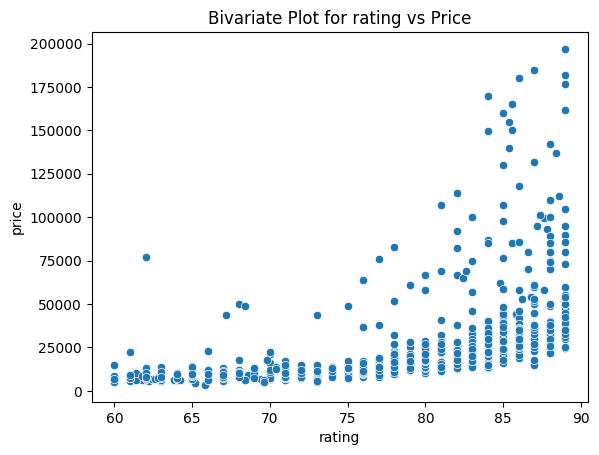

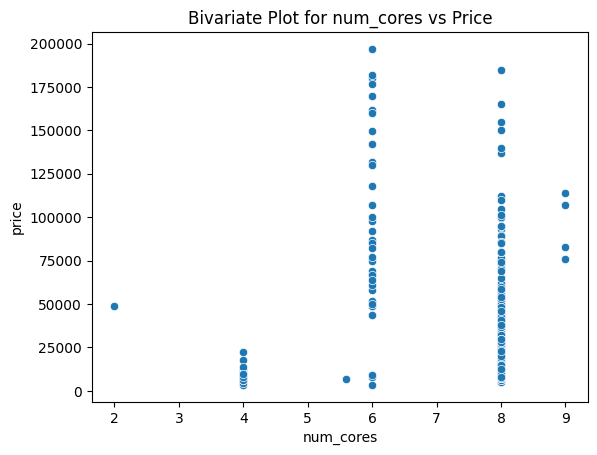

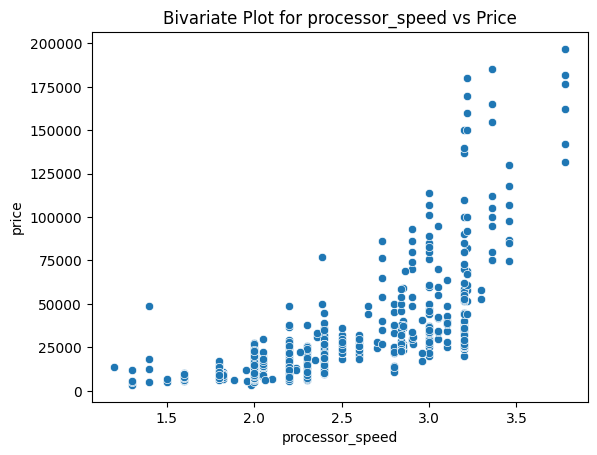

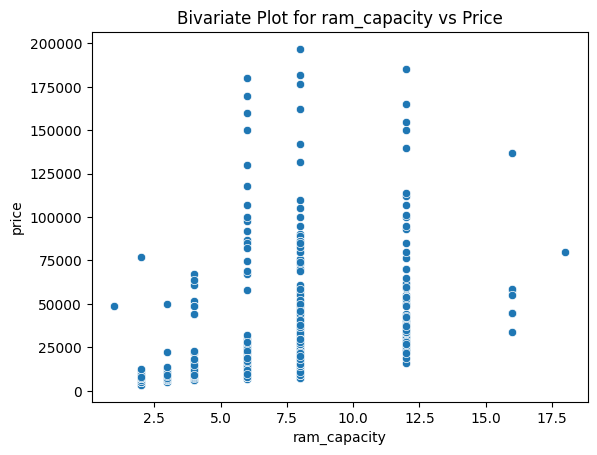

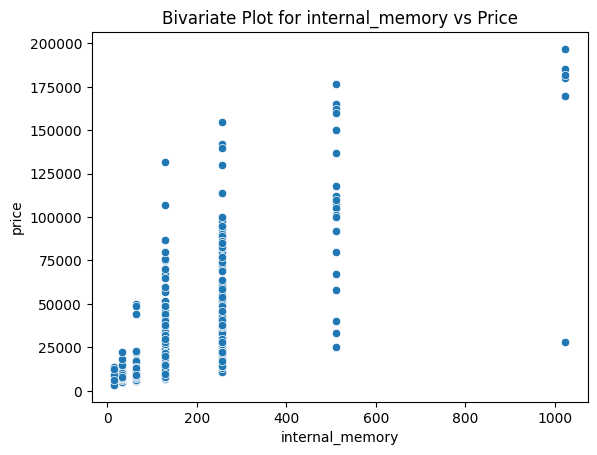

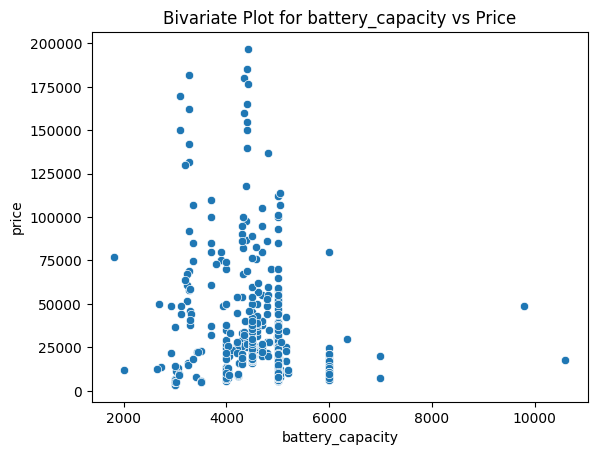

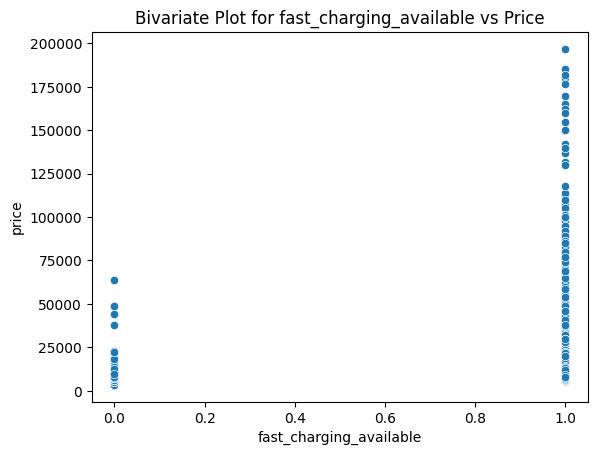

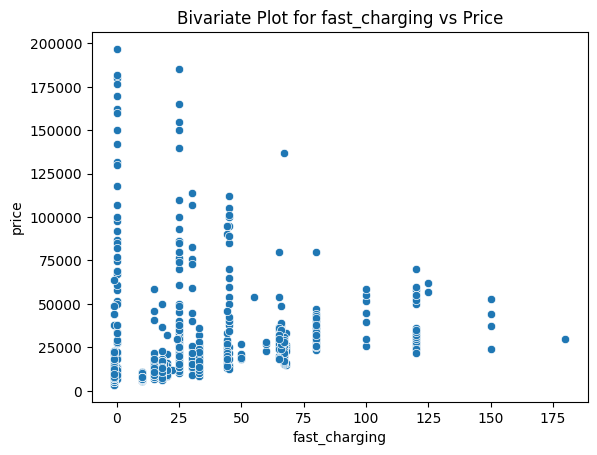

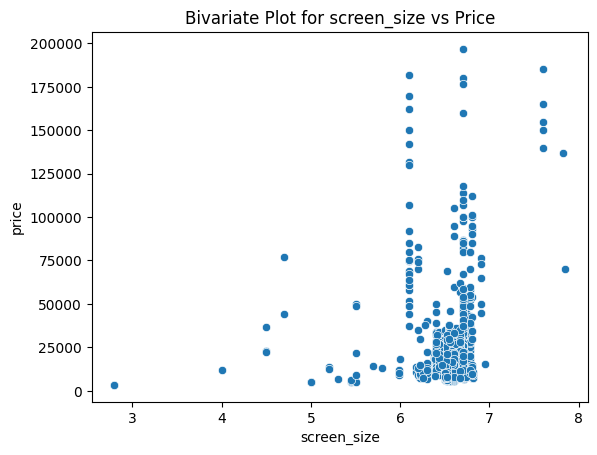

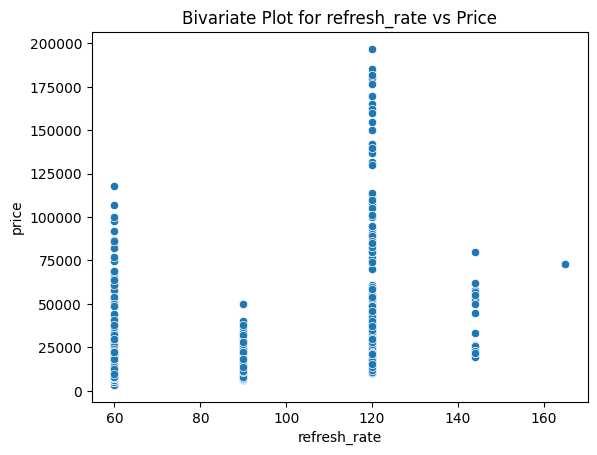

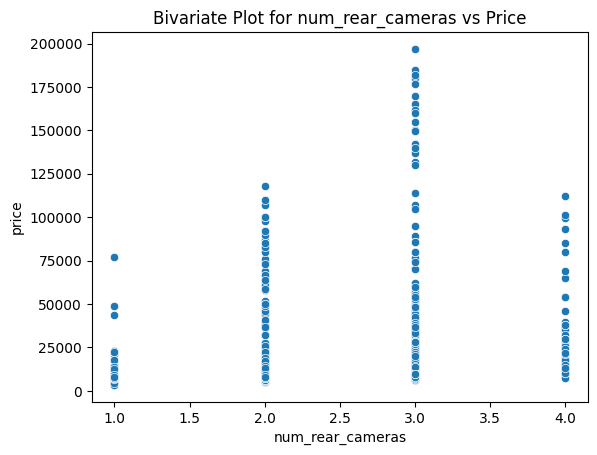

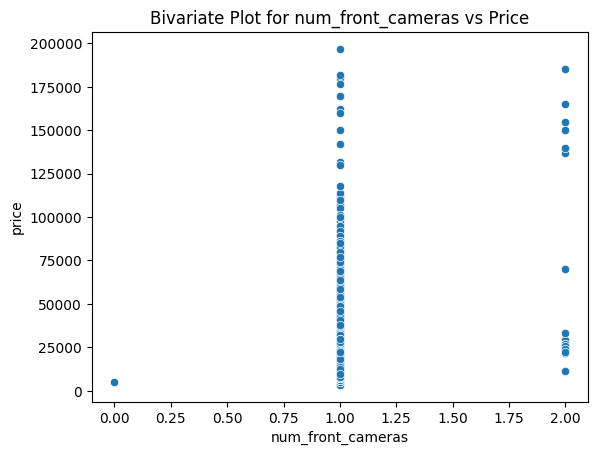

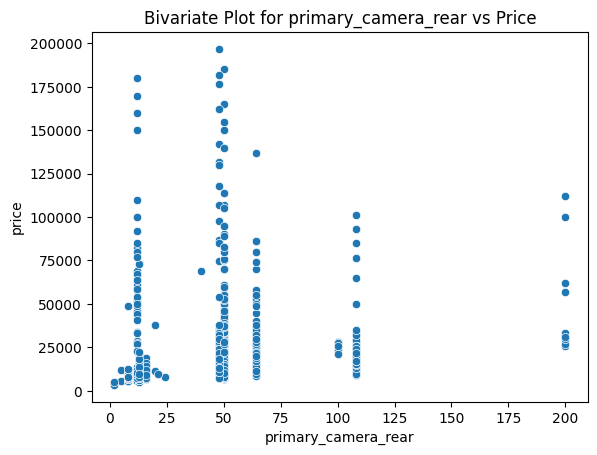

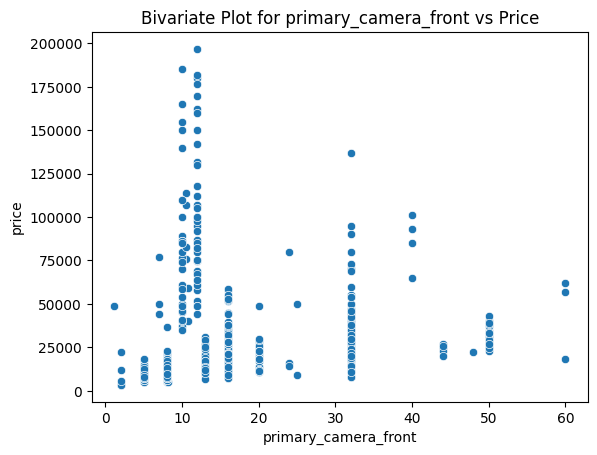

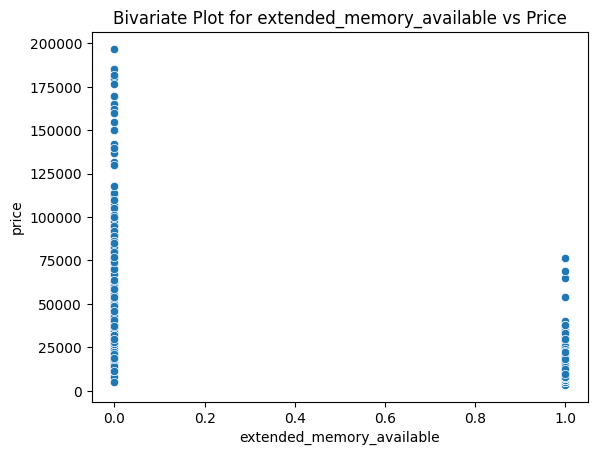

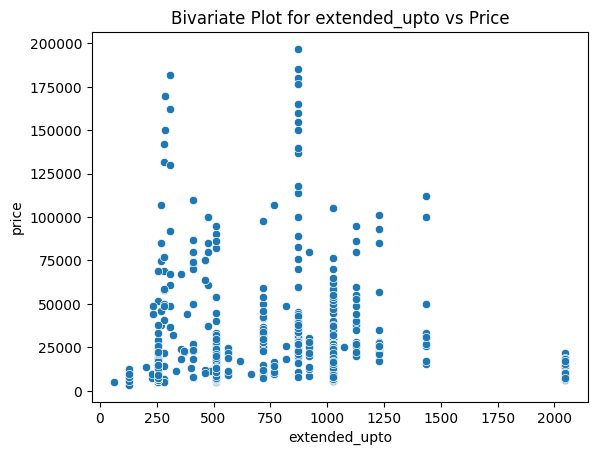

In [126]:
# Create scatter plots for each numerical feature against 'price'
for feature in numerical_features:
    if feature == 'price' and 'fast_charging_available' and 'extended_memory_available':
        pass
    else:
        sns.scatterplot(x=feature, y='price', data=df)
        plt.title(f'Bivariate Plot for {feature} vs Price')
        plt.show()



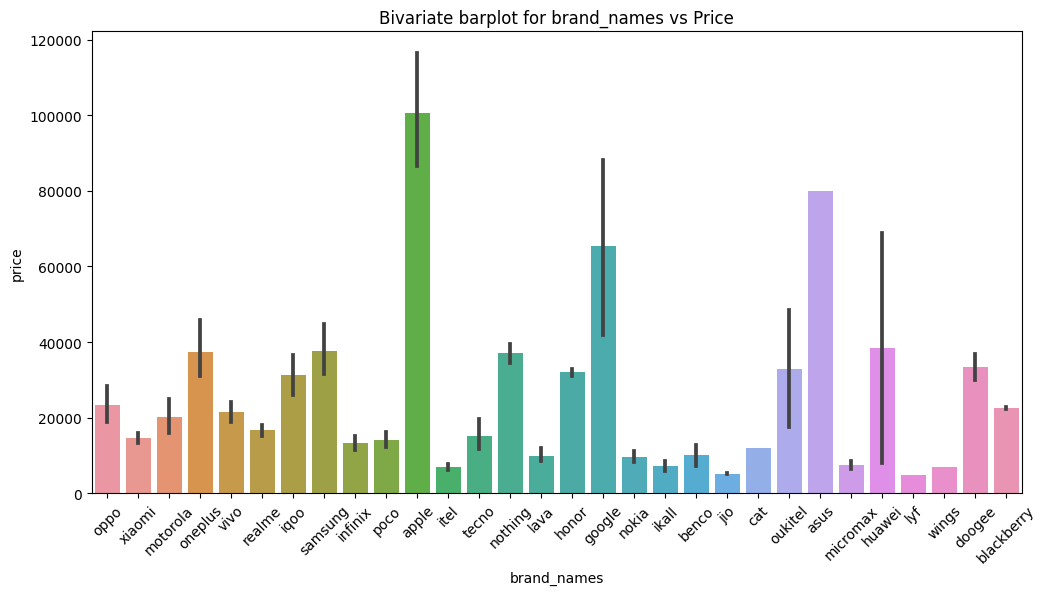

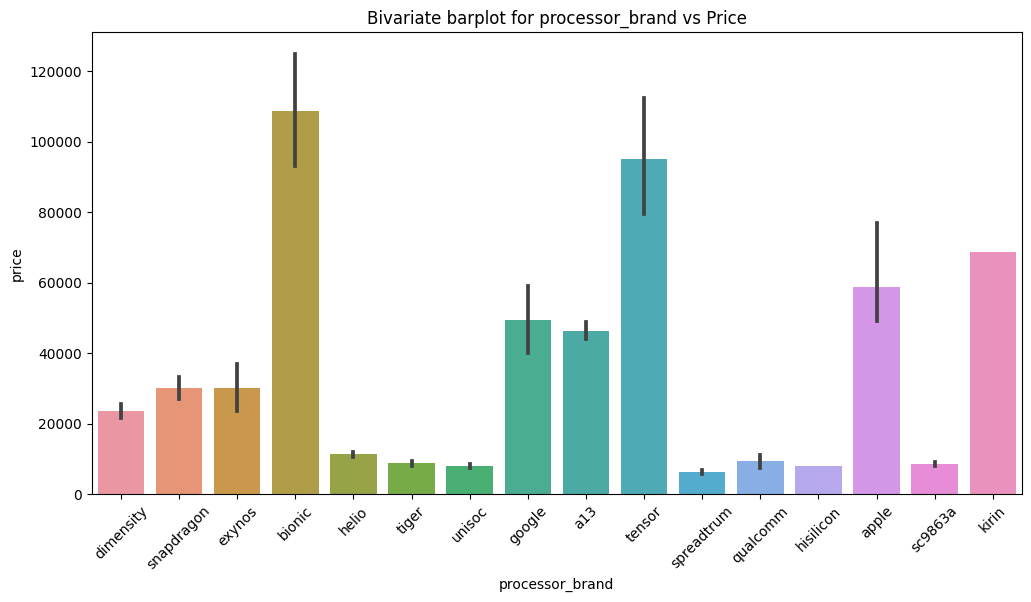

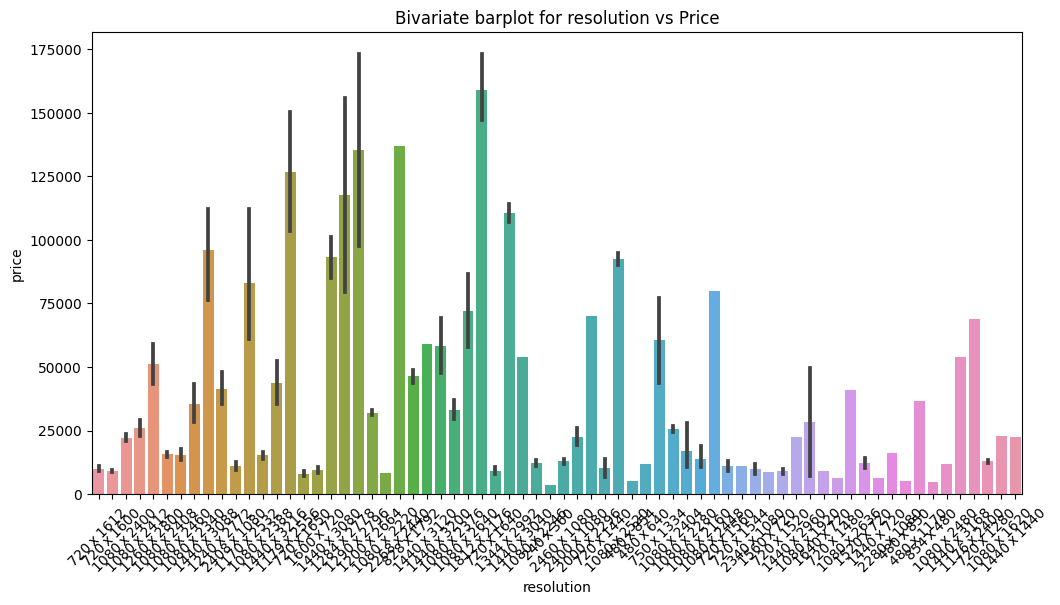

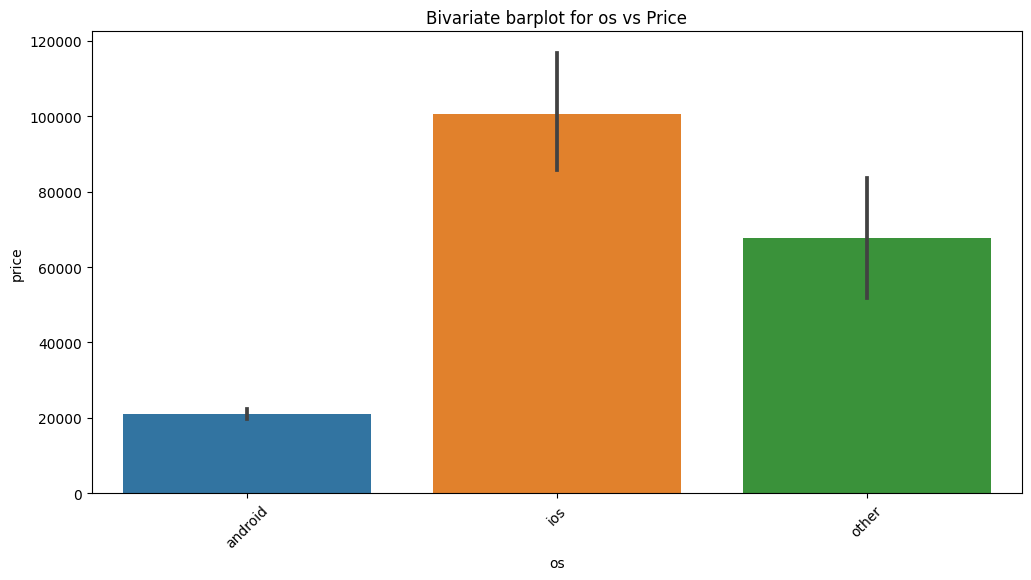

In [119]:
# Create bar plots for each categorical feature against 'price'
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature, y='price', data=df)
    plt.title(f'Bivariate barplot for {feature} vs Price')
    plt.xticks(rotation=45)
    plt.show()

In [132]:
num_pair_col = df.select_dtypes(include=['float64','int64']).iloc[:,[0,1,3,4,5,10]].columns

C:\Users\uttam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


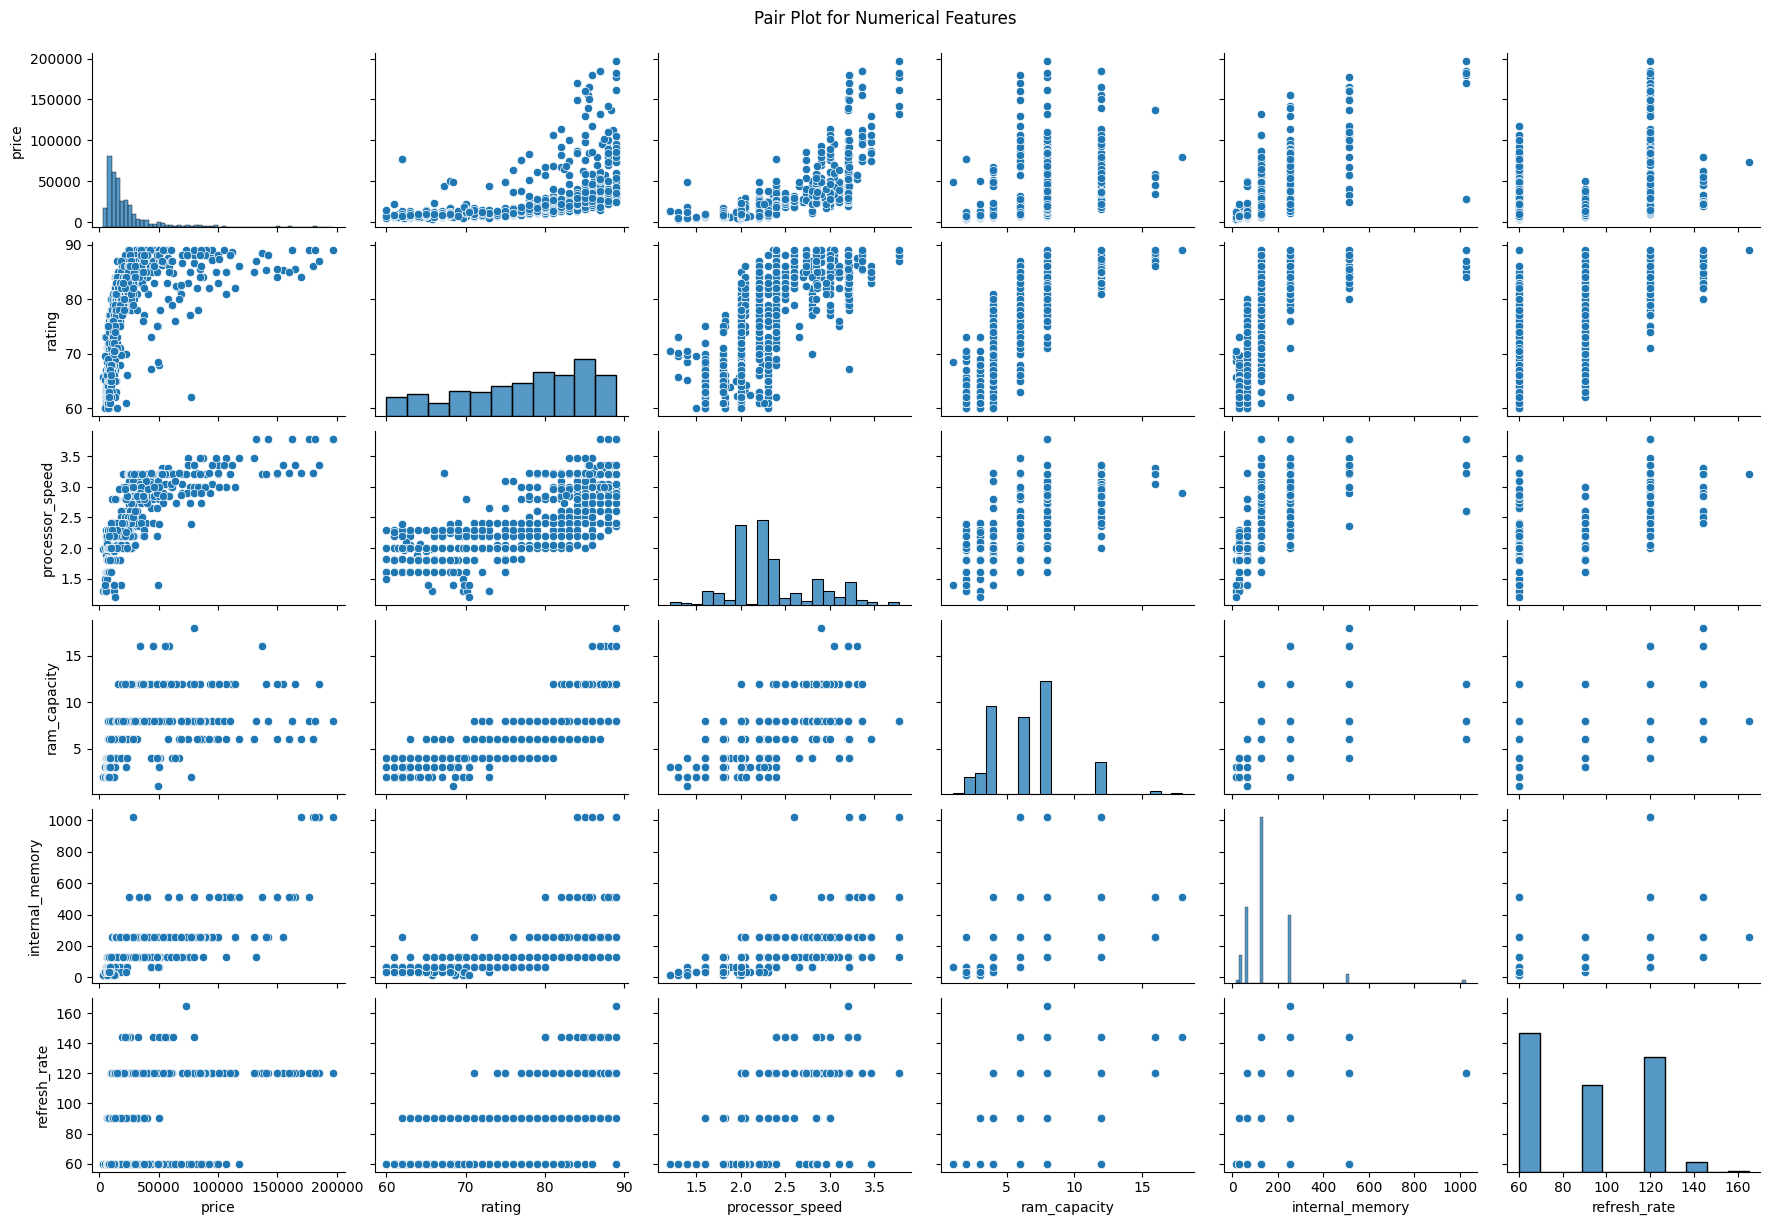

In [133]:
# Pair plot for numerical columns
sns.pairplot(df[num_pair_col], height=2, aspect=1.5)
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

insights - 
-Apple phones have highest prices following google and asus
-ios operating system is much more cost than android.
-bionic has highest price following tensor and kirin processor